In [ ]:
!pip install transformers pandas scikit-learn matplotlib


In [ ]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Reviews.csv', on_bad_lines='skip', engine='python')
df = df[['Text', 'Score']].dropna()
df = df.head(100)  # subset for quick testing

# Map Score to Sentiment Labels
def map_sentiment(score):
    if score <= 2:
        return 'NEGATIVE'
    elif score == 3:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

df['label'] = df['Score'].apply(map_sentiment)

In [ ]:
models = [
    "distilbert-base-uncased-finetuned-sst-2-english",
    "nlptown/bert-base-multilingual-uncased-sentiment",
    "cardiffnlp/twitter-roberta-base-sentiment",
    "finiteautomata/bertweet-base-sentiment-analysis",
    "siebert/sentiment-roberta-large-english"
]

results = {}
accuracies = {}


In [ ]:
print("Testing Model 1: DistilBERT")
sentiment_pipeline = pipeline("sentiment-analysis", model=models[0])

preds = []
for text in df['Text']:
    # Truncate input text to first 256 words to stay within token limit
    words = text.split()
    truncated_text = ' '.join(words[:256])

    pred = sentiment_pipeline(truncated_text)[0]['label']
    preds.append(pred)

accuracy = accuracy_score(df['label'], preds)
accuracies[models[0]] = accuracy
print(f"Accuracy: {accuracy}")


Testing Model 1: DistilBERT


Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Accuracy: 0.75


In [ ]:
print("Testing Model 2: nlptown BERT Multilingual")
sentiment_pipeline = pipeline("sentiment-analysis", model=models[1])

preds = []
for text in df['Text']:
    # Truncate input text to first 256 words
    words = text.split()
    truncated_text = ' '.join(words[:256])

    pred = sentiment_pipeline(truncated_text)[0]['label']

    # Map 1-5 stars to sentiments
    if pred in ['1 star', '2 stars']:
        pred = 'NEGATIVE'
    elif pred == '3 stars':
        pred = 'NEUTRAL'
    else:
        pred = 'POSITIVE'

    preds.append(pred)

accuracy = accuracy_score(df['label'], preds)
accuracies[models[1]] = accuracy
print(f"Accuracy: {accuracy}")


Testing Model 2: nlptown BERT Multilingual


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


Accuracy: 0.86


In [ ]:
print("Testing Model 3: CardiffNLP RoBERTa")
sentiment_pipeline = pipeline("sentiment-analysis", model=models[2])

preds = []
for text in df['Text']:
    # Truncate text to first 256 words for safety
    words = text.split()
    truncated_text = ' '.join(words[:256])

    pred = sentiment_pipeline(truncated_text)[0]['label']

    # Map LABELs to sentiments
    if pred == 'LABEL_0':
        pred = 'NEGATIVE'
    elif pred == 'LABEL_1':
        pred = 'NEUTRAL'
    elif pred == 'LABEL_2':
        pred = 'POSITIVE'

    preds.append(pred)

accuracy = accuracy_score(df['label'], preds)
accuracies[models[2]] = accuracy
print(f"Accuracy: {accuracy}")


Testing Model 3: CardiffNLP RoBERTa


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


Accuracy: 0.81


In [ ]:
print("\nFinal Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc}")



Final Model Accuracies:
distilbert-base-uncased-finetuned-sst-2-english: 0.75
nlptown/bert-base-multilingual-uncased-sentiment: 0.86
cardiffnlp/twitter-roberta-base-sentiment: 0.81


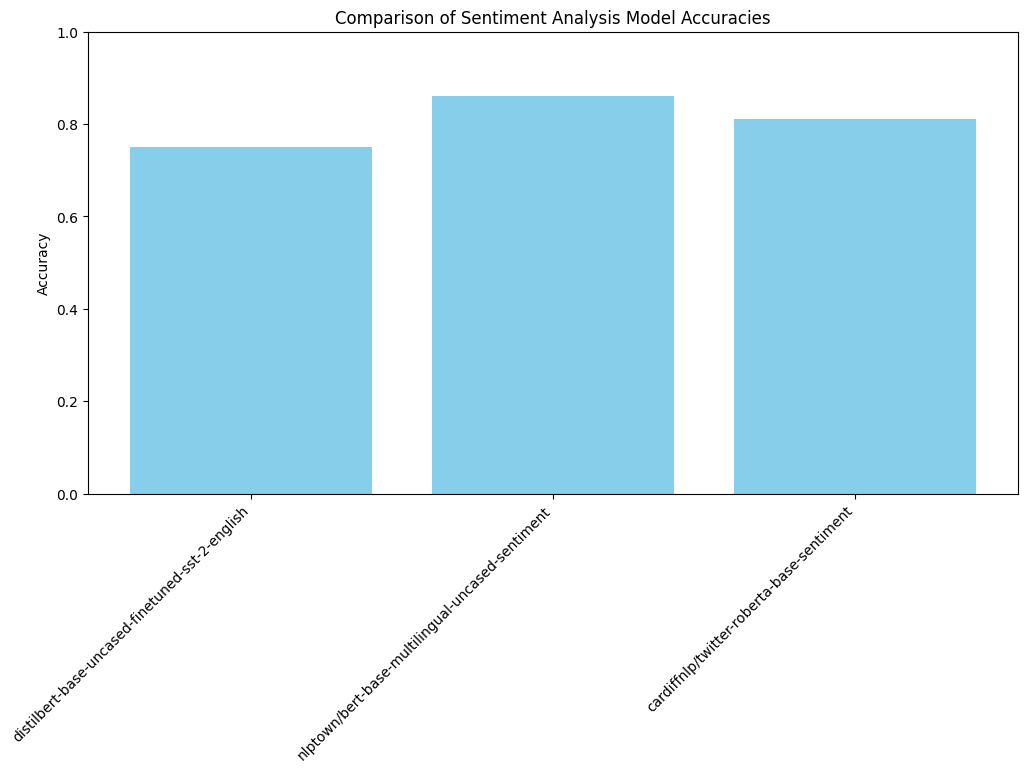

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Comparison of Sentiment Analysis Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()
